# Rohan Kunte: Comcast Telecom Consumer Complaints 


**DESCRIPTION**
Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

**Data Dictionary**<br>
•	Ticket #: Ticket number assigned to each complaint<br>
•	Customer Complaint: Description of complaint<br>
•	Date: Date of complaint<br>
•	Time: Time of complaint<br>
•	Received Via: Mode of communication of the complaint<br>
•	City: Customer city<br>
•	State: Customer state<br>
•	Zipcode: Customer zip<br>
•	Status: Status of complaint<br>
•	Filing on behalf of someone<br>

**Analysis Task**<br>
To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.<br>
- Import data into Python environment.<br>
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.<br>
- Provide a table with the frequency of complaint types.<br>
•	Which complaint types are maximum i.e., around internet, network issues, or across any other domains.<br>
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.<br>
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:<br>
•	Which state has the maximum complaints<br>
•	Which state has the highest percentage of unresolved complaints<br>
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

### <font color=red>Question:</font> Import data into Python environment

In [1]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

### <font color=red>Question:</font> Import data into Python environment.

In [2]:
dataset = pd.read_csv('./Dataset/comcast_data.csv')                                 # Importing the Dataset

dataset['State'].replace('District of Columbia', 'District Of Columbia',inplace=True)
dataset['Date'] = pd.to_datetime(dataset['Date'])                                   # Converting Dates column to 'datetime' type
dataset['Date_month_year'] = pd.to_datetime(dataset['Date_month_year'])
dataset['Date_str'] = dataset['Date_month_year'].apply(lambda x: x.strftime('%m%d'))# temp col
dataset.sort_values(by ='Date_str', ascending=True, inplace=True)                   # Sort the Dataset Chronologically
dataset.drop(['Date_str'], axis=1, inplace=True)                                    # drop the temp col
dataset.drop('Date', axis=1, inplace=True)                                          # Check for missing/inappropriate data
dataset['Date'] = dataset['Date_month_year']
dataset.drop('Date_month_year', axis=1, inplace=True)
dataset.head(1)

,Ticket #,Customer Complaint,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date
1160,211472,comcast cable,10:43:20 AM,Customer Care Call,Lockport,Illinois,60441,Closed,No,2015-01-04


In [3]:
#Check for missing/inappropriate data (None)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2224 entries, 1160 to 2076
Data columns (total 10 columns):
Ticket #                       2224 non-null object
Customer Complaint             2224 non-null object
Time                           2224 non-null object
Received Via                   2224 non-null object
City                           2224 non-null object
State                          2224 non-null object
Zip code                       2224 non-null int64
Status                         2224 non-null object
Filing on Behalf of Someone    2224 non-null object
Date                           2224 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 191.1+ KB


### <font color=red>Question:</font> Provide the trend chart for the number of complaints at monthly and daily granularity levels.

**Daily Trend**

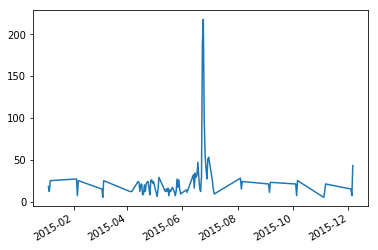

In [4]:
dataset['Date'].value_counts().plot()

**Monthly Trend**

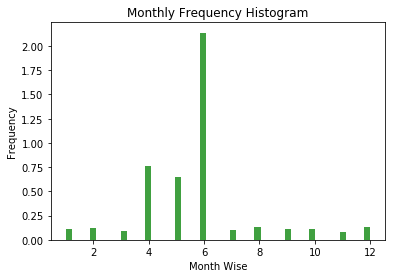

In [5]:
dataset['Month'] = pd.DatetimeIndex(dataset['Date']).month
n, bins, patches = plt.hist(dataset['Month'], 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Month Wise')
plt.gca().set(title='Monthly Frequency Histogram', ylabel='Frequency');

### <font color=red>Question:</font> Provide a table with the frequency of complaint types.

In [6]:
#For better analysis, let us simplify the complaints.
dataset['Customer Complaint'] = dataset['Customer Complaint'].str.lower()

In [7]:
complaint_table = pd.DataFrame(dataset['Customer Complaint'].value_counts())
complaint_table.head()
#Please Note that there are still Singular and Plurals which should be counted as the same category. 
#But this out of this projects Scope. NLP algorithms will be the future scope of this task.

,Customer Complaint
comcast,102
comcast data cap,30
comcast internet,29
comcast data caps,21
comcast billing,18


### <font color=red>Above</font>  is the tabular representation of 'Types of Complaints' and their Frequencies<br> AND<br> <font color=red>Below</font> is the 'Word Cloud' of our complaints for better understanding of this casestudy.

(-0.5, 2999.5, 1999.5, -0.5)

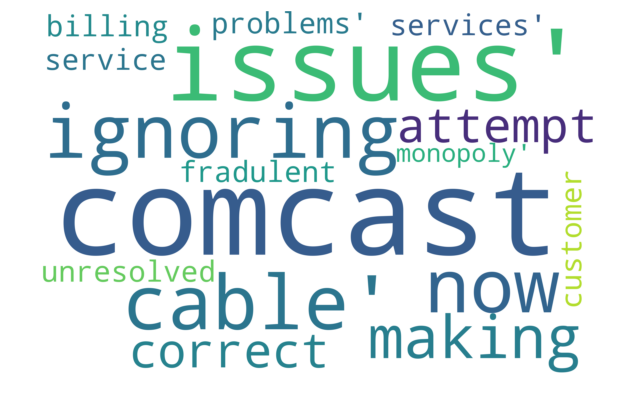

In [8]:
text = dataset['Customer Complaint'].values
wordcloud = WordCloud(width = 3000, height = 2000, background_color = 'white',stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(figsize = (10, 30))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

### <font color=red>Question:</font> Which complaint types are maximum?<br><font color=red>Inference:</font> While we are uncertain about the type 'comcast', we can infer that the most frequent complaints are around the internet services(Internet speed), cables(Harware issues) and 'Data Caps'

### <font color=red>Question:</font>Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [9]:
dataset['Status'].replace('Pending', 'Open',inplace=True)
dataset['Status'].replace('Solved', 'Closed',inplace=True)
dataset['Status'] = dataset.Status.astype('category')
dataset['Status'].value_counts()

Closed    1707
Open       517
Name: Status, dtype: int64

<font color=red>Question:</font> Provide state wise status of complaints in a stacked bar chart.<br>
<font color=red>Question:</font> Provide state wise status of complaints in a stacked bar chart. Provide insights on:<br>
•	Which state has the maximum complaints<br>
•	Which state has the highest percentage of unresolved complaints<br>
<font color=red>Question:</font> Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [10]:
bystate = dataset[['Ticket #', 'State']].groupby('State').size()

**Let's View the number of complaints per state to get a general idea of the situation: **

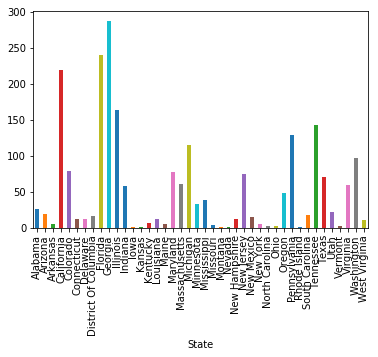

In [11]:
#Number of complaints per State
bystate.plot(kind='bar')

**From the above plot: [Georgia, Florida, Californa, Illinois] Stand out the most**

### <font color=red>Question:</font> Provide state wise status of complaints in a stacked bar chart.

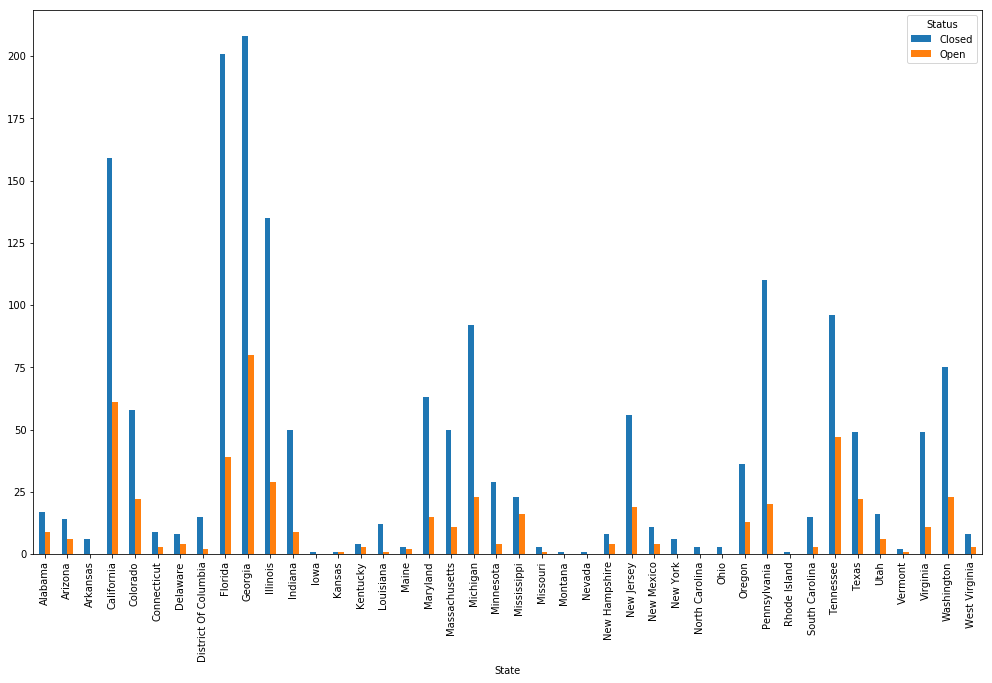

In [12]:
dataset.groupby('State').Status.value_counts().unstack().plot.bar(figsize=(17,10))

### <font color=red>Question:</font> Provide insight on:<br>
•	Which state has the maximum complaints<br>

In [13]:
#Maximum complaints
dataset.State.value_counts().head(1) 

Georgia    288
Name: State, dtype: int64

### <font color=red>Question:</font> Provide insight on:<br>
•	Which state has the highest percentage of unresolved complaints

In [14]:
d = pd.DataFrame(dataset.groupby('State').Status.value_counts().unstack())
d['Open_Perc'] = (d['Open'] / (d['Closed']+d['Open']))*100
print("highest percentage of unresolved complaints = {}".format(d['Open_Perc'].max()))
h = d['Open_Perc'].max()
d[d['Open_Perc'] == h]

highest percentage of unresolved complaints = 50.0


Status,Closed,Open,Open_Perc
State,,,
Kansas,1.0,1.0,50.0


**Even though the question asks about the maximum open complaints, it is vital to note the maximum open complaints are from <font color=red>'Georgia'</font> as shown below:**

In [15]:
print("Maximum Open Complaints = {}".format(d['Open'].max()))
d[d['Open'] == 80]

Maximum Open Complaints = 80.0


Status,Closed,Open,Open_Perc
State,,,
Georgia,208.0,80.0,27.777778


### <font color=red>Question:</font> Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

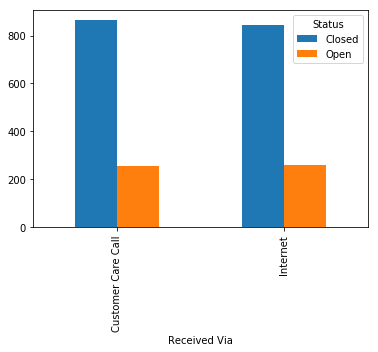

In [16]:
dataset.groupby('Received Via').Status.value_counts().unstack().plot.bar()

In [17]:
i = pd.DataFrame(dataset.groupby('Received Via').Status.value_counts().unstack())
i['Percentage Resolved'] = (i['Closed'] / (i['Closed'] + i['Open'])) * 100
print(i)

Status              Closed  Open  Percentage Resolved
Received Via                                         
Customer Care Call     864   255            77.211796
Internet               843   262            76.289593


### Thank You